<div class="alert alert-block alert-success">
<center> <h1> Projeto - ICD </h1> </center> <br>
<center> <h2> Introdução à Ciência de Dados </h2> </center> <br>
<center><h3> Docente: Gabriela Soares @ Universidade Lusófona</h3> </center><br>
<center><h3> Alunos:
João Eleutério a22308295
Rita Santos a22310439</h3> </center><br>
<center> 2023/2024 </center>

# Índice

* [1. Análise Exploratória dos Dados](#inicial)
    * [1.1. Introdução e Contexto](#intro)
    * [1.2. Import Libraries and Initial Definitions](#import)
    * [1.3. Leitura e visualização ficheiros](#readfiles)
    * [1.4.  Identificação das colunas](#ident)
    * [1.5. Resumo estatístico](#resumo)
    * [1.6. Visualizações Gráficas](#visualizacao)
    * [1.7. Tratamento de erros](#traterro)
    * [1.8. Correlação entre Variáveis](#corre)
    * [1.9.  Identificação de Outliers](#outliers)
    * [1.10. Teste de Hipóteses: Há diferença de preço significativa entre casas térreas e casas com mais de um andar?](#testhip)
* [2. Regrassão Linear](#reglinear)
* [3. Conclusão](#conclusao)

<hr>

<h1><a class="anchor" id="inicial">1.  Análise Exploratória dos Dados</a></h1>

<hr>

<h2><a class="anchor" id="intro">1.1.  Introdução e Contexto</a></h2>

Neste trabalho foi nos dado um dataset, home_data.csv, com o objetivo de realizar a Análise Exploratória dos Dados, um Teste de Hipóteses: Há diferença de preço significativa entre casas térreas e casas com mais de um andar? e uma Regressão Linear.

<hr>

<h2><a class="anchor" id="import">1.2. Import Libraries and Initial Definitions</a></h2>

In [1]:
# Installation:
# Instalar as libraries (caso já tenha pode comentar as linhas seguintes)

#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


ModuleNotFoundError: No module named 'sklearn'

<hr>

<h2><a class="anchor" id="readfiles">1.3.  Leitura e visualização ficheiros</a></h2>

In [9]:
# Ler o ficheiro do dataset
df=pd.read_csv("home_data.csv", sep=",")
# Observar Shape
print(df.shape)
# Observar primeiras 5 linhas
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Lêmos o arquivo de conjunto de dados chamado "home_data.csv", em seguida, exibemos o formato do conjunto de dados (número de linhas e colunas) e as cinco primeiras linhas do conjunto de dados, mostrando as características (features).

<hr>

<h2><a class="anchor" id="ident">1.4.  Identificação das colunas</a></h2>

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

- Id
 - date - data
 - price - preço
 - bedrooms - quartos
 - bathrooms - casas de banho
 - sqft_living - casa feets 
 - sqft_lot - lote feets 
 - floors - andares
 - waterfront - beira-mar
 - view - vista
 - condition - condições
 - grade - nota
 - sqft_above - pisos feets 
 - sqft_basement - cave feets 
 - yr_built - ano de contrução
 - yr_renovated - ano de renovação
 - zipcode -codigo postal
 - lat - latitude
 - long - longitude
 - sqft_living15 - feets da casa
 - sqft_lot15 - feets do terreno

Aqui mostramos as colunas do dataset e o que cada coluna significa.

<hr>

<h2><a class="anchor" id="resumo">1.5.  Resumo estatístico</a></h2>

In [11]:
# Resumo estatístico de todas as variaveis numericas do dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:
# Função que imprime quantas linhas uma coluna tem preenchida com valores nao Nan
def imprimir_quantidade_linhas_com_valores(coluna):
    # Quantidade de linhas com valores na coluna
    quantidade_valor = df[coluna].count()
    # Imprimir a quantidade de valores não NaN da coluna
    print(f'Existem {quantidade_valor} linhas com valores nao NaN de {len(df[coluna])} linhas na coluna {coluna}.')


# Função que imprime o top 5 e o bottom 5 da coluna
def imprimir_top(coluna):
    dicionario = df[coluna].value_counts().to_dict()
    # Ordenar o dicionario para obter os valores mais usados
    lista = sorted(dicionario.items(), key=lambda x: x[1], reverse=True)
    
    # Imprimir o item mais usado
    print(f'{coluna} com mais aparições é: {lista[0][0]}, {lista[0][1]}.')
    print(f"O top 5 {coluna}:")
    df_top = pd.DataFrame(lista[:5], columns=[coluna, 'Number'])
    print(f'{df_top}\n')
    # Imprimir o top 5 menos usados
    if len(lista) > 5:
        print(f"\nO bottom 5 {coluna}:")
        df_bottom = pd.DataFrame(sorted(lista, key=lambda x: x[1])[:5], columns=[coluna, 'Number'])
        print(f'{df_bottom}\n')

# Função que imprime os valores unicos da coluna
def imprimir_valores_unicos(coluna):
    # Ordena os valores unicos 
    valores_unicos = sorted(df[coluna].unique())
    # Imprime os valores unicos da coluna
    print(f'Os valores da coluna {coluna} são: {", ".join(map(str, valores_unicos))}.\n')

# Função que transforma os valores em 'Unknown' em colunas que tenham texto e imprime um dataset com cada valor e as ocorrências
# Se for numérico muda para -100 e imprime o top e bottom 5 da coluna
def transform_Nan(coluna):
    imprimir_quantidade_linhas_com_valores(coluna)
    if coluna not in ['id','price','date']:
        imprimir_valores_unicos(coluna)
    if coluna in df.select_dtypes(include=['object']):
        df[coluna] = df[coluna].fillna('Unknown')
    else:
        df[coluna] = df[coluna].fillna(-100)
    imprimir_top(coluna)

In [13]:
for col in df.columns:
    transform_Nan(col)

Existem 21613 linhas com valores nao NaN de 21613 linhas na coluna id.
id com mais aparições é: 795000620, 3.
O top 5 id:
           id  Number
0   795000620       3
1  8651510380       2
2  2568300045       2
3  9353300600       2
4  4139480200       2


O bottom 5 id:
           id  Number
0  2856100360       1
1   629800540       1
2  7575610760       1
3  2301400325       1
4  6699930530       1

Existem 21613 linhas com valores nao NaN de 21613 linhas na coluna date.
date com mais aparições é: 20140623T000000, 142.
O top 5 date:
              date  Number
0  20140623T000000     142
1  20140626T000000     131
2  20140625T000000     131
3  20140708T000000     127
4  20150427T000000     126


O bottom 5 date:
              date  Number
0  20150110T000000       1
1  20150527T000000       1
2  20140803T000000       1
3  20141130T000000       1
4  20150215T000000       1

Existem 21613 linhas com valores nao NaN de 21613 linhas na coluna price.
price com mais aparições é: 450000, 172.
O

Fazemos um pouco de EDA 
Onde mostramos quantas linhas nulas existem em cada coluna
O número com mais aparições
E o top 5 de mais aparições e os com menos aparições


Em que podemos tirar algumas conclusões:

    - Existem ids iguais.
    - Existem disparidades de aparições muito elavadas em muitas colunas ( ex: coluna sqft_lot15 temos 427 apariçõesde 5000 e 1 de 8471)
    - Não existem linhas com NaNs
    - Valores errados como ter 1.75 casas de banho e 33 quartos


<hr>

<h2><a class="anchor" id="visualizacao">1.6. Visualizações Gráficas</a></h2>

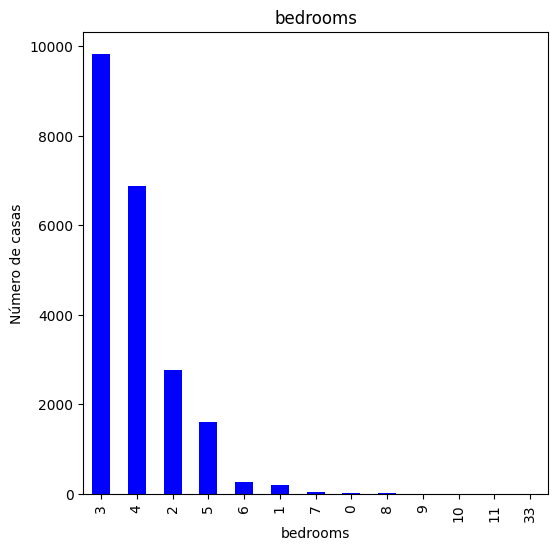

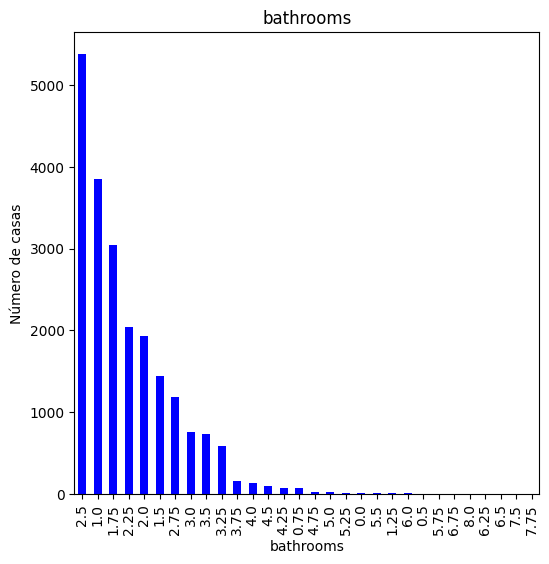

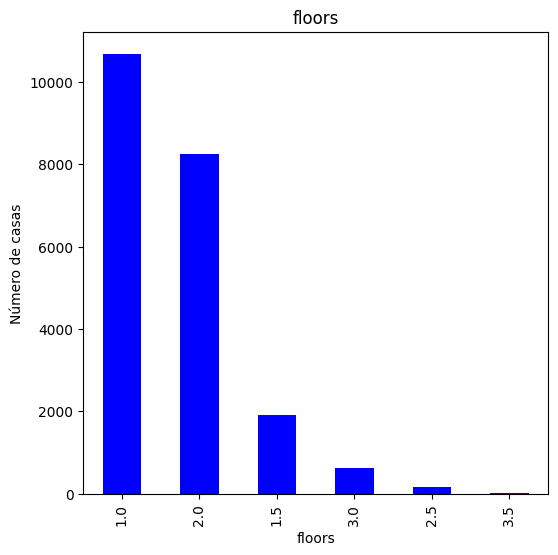

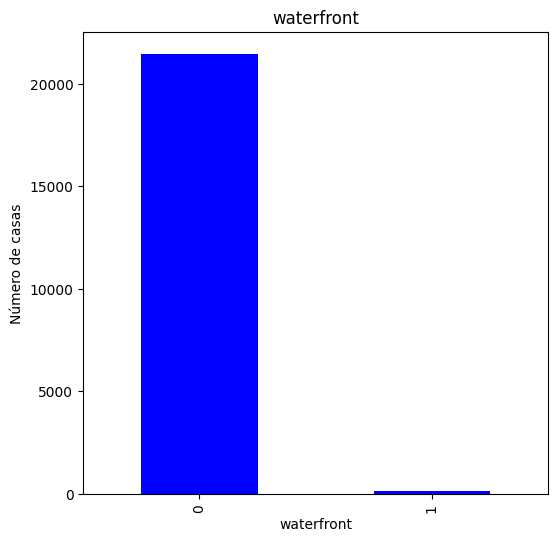

In [17]:
num_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront']

for col in num_cols:
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    counts = df[col].value_counts()
    counts.plot.bar(ax=ax, color='blue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Número de casas')
    plt.show()




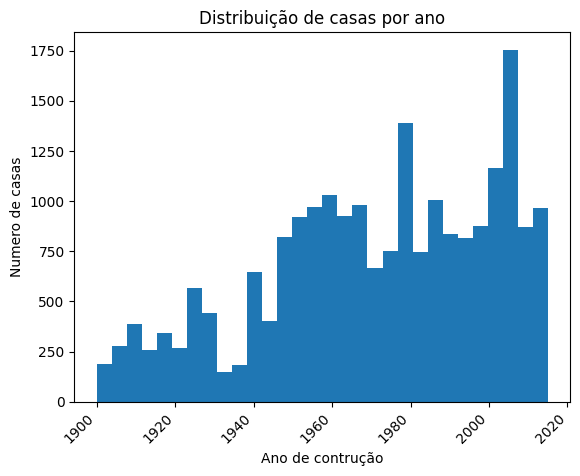

In [18]:
year_counts = df['yr_built'].value_counts().sort_index()

x = year_counts.index
y = year_counts.values

plt.hist(df['yr_built'],bins=30)
plt.title('Distribuição de casas por ano')
plt.xlabel('Ano de contrução')
plt.ylabel('Numero de casas')
plt.xticks(rotation=45, ha='right')

plt.show()

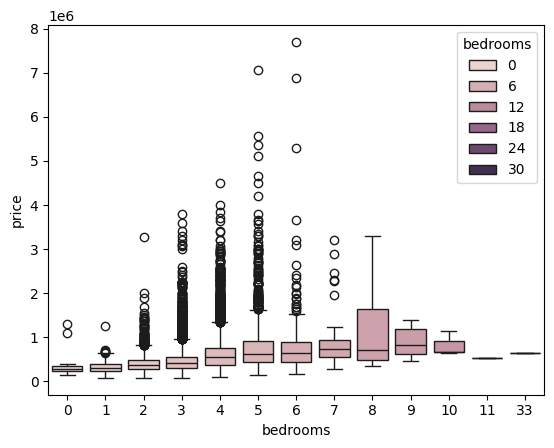

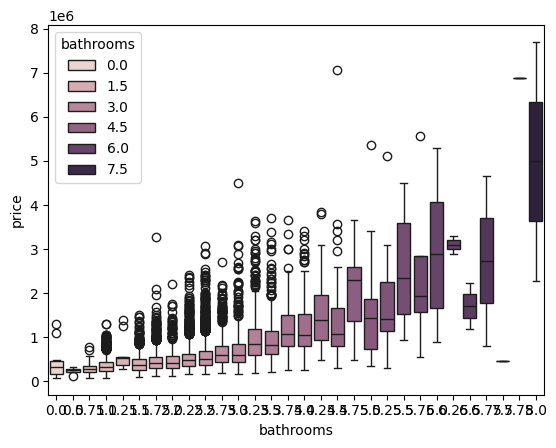

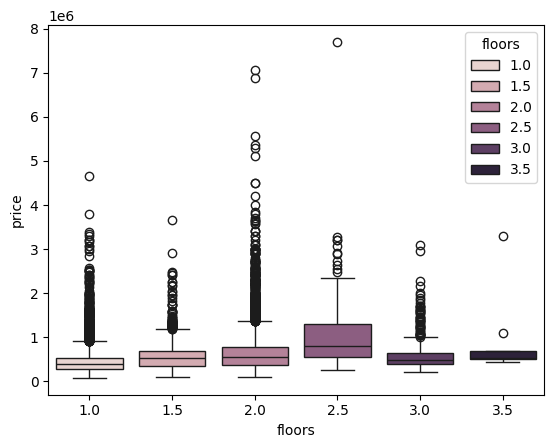

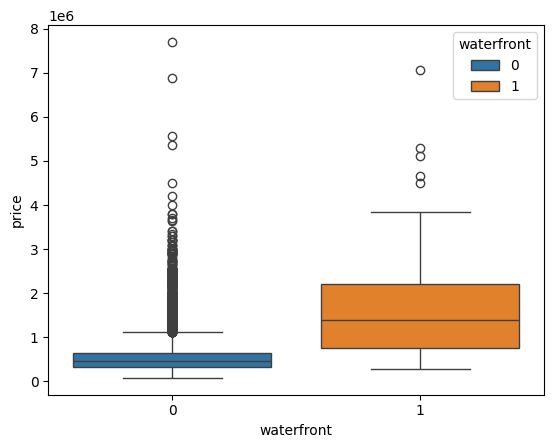

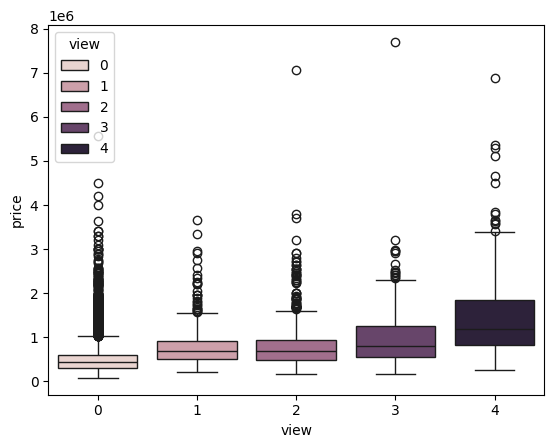

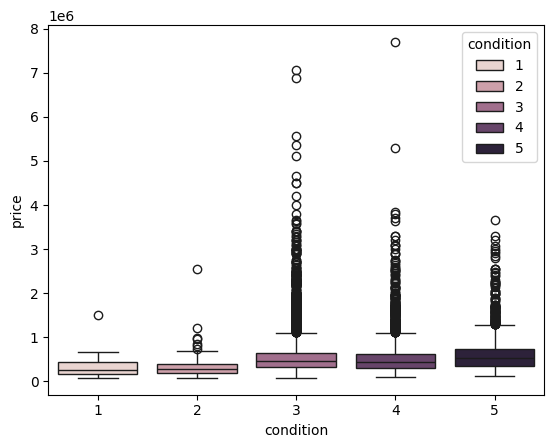

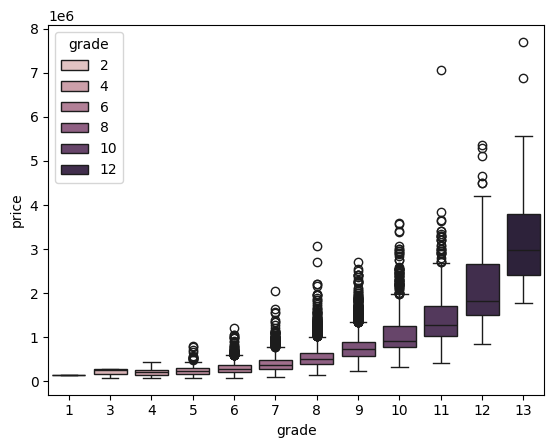

In [20]:
num_cols = ['bedrooms', 'bathrooms', 'floors',
 'waterfront', 'view', 'condition','grade']

for col in num_cols:
    sns.boxplot(x=col, y='price', data=df, hue=col)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()






<hr>

<h2><a class="anchor" id="traterro">1.7. Tratamento de erros</a></h2>

In [ ]:
# Se existem ids duplicados não precisamos da coluna porque o unico significado dela seria diferenciar por um numero
print(df['id'].duplicated().sum())
df = df.drop(columns='id', axis=1)

In [ ]:
# Para não perder muitos valores, e assumindo que não podem haver decimais, optamos por simplesmente arredondar todos 
df['bathrooms'] = df['bathrooms'].astype(int)

df['floors'] = df['floors'].astype(int)

In [ ]:
# Valor exageradamente alto vamos eliminar
df = df.loc[df['bedrooms'] <= 12]

<hr>

<h1><a class="anchor" id="corre">1.8.  Correlação entre Variáveis</a></h1>

In [ ]:
# Selecionando apenas colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculando a matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Visualizando a matriz de correlação com um mapa de calor usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Conseguimos observar a correlação das variaveis, umas têm positivas outras negativas 
A correlação é de 1 a -1, quanto maior a correlação significa que quando uma das variaveis aumenta a outra aumenta e vice-versa, quanto menor a correlação significa que quando uma das variaveis aumenta a outra diminui.

<hr>

<h1><a class="anchor" id="outliers">1.9.  Identificação de Outliers</a></h1>

In [ ]:
# Calculando o numero de subplots necessarios
num_subplots = len(numeric_columns)

# Definindo o numero de linhas e colunas com base no numero de subplots
num_linhas = (num_subplots - 1) // 3 + 1
num_colunas = min(num_subplots, 3)


# Criar um dicionario para armazenar os outliers de cada coluna
outliers_dict = {}

# Criando boxplots para cada coluna numerica
plt.figure(figsize=(16, 5 * num_linhas))  # Ajuste o tamanho conforme necessário


# Iterar sobre as colunas numericas
for i, coluna in enumerate(numeric_columns, 1):
    
    plt.subplot(num_linhas, num_colunas, i)
    
    # Criando um boxplot sem criar uma coluna adicional para outliers
    sns.boxplot(data=df, y=coluna)
    
    # Calcular o primeiro e terceiro quartis para a coluna
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)

    # Calcular o intervalo interquartil (IQR) para a coluna
    iqr = q3 - q1

    # Definir limites para identificar outliers para a coluna
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identificar outliers para a coluna
    outliers = (df[coluna] < lower_bound) | (df[coluna] > upper_bound)

    plt.title(f'Boxplot - {coluna}')
    
    # Verificar se há outliers para a coluna
    if outliers.any():
        # Armazenar os valores únicos dos outliers no dicionário
        outliers_dict[coluna] = df.loc[outliers, coluna].unique()

# Ajuste do layout para evitar sobreposição
plt.tight_layout()
plt.show()

Conseguimos ver que existem vários outliers neste dataset mas sem nenhuma confiarmação do "cliente" decidimos não alterar.

<hr>

<h2><a class="anchor" id="testhip">1.10. Teste de Hipóteses: Há diferença de preço significativa entre casas térreas e casas com mais de um andar?</a></h2>

Hipótese nula (H0): Não há diferença significativa nos preços entre casas térreas e casas com mais de um andar.

Hipótese alternativa (H1): Há diferença significativa nos preços entre casas térreas e casas com mais de um andar.

In [ ]:
# Criar uma nova coluna indicando se a casa tem apenas um andar ou mais de um andar
df['isTerrea'] = df.apply(lambda row: 1 if row['floors'] == 1  else 0, axis=1)



# Agregar os dados com base na nova coluna
aggregated_data = df.groupby('isTerrea').count()

print(aggregated_data)

In [ ]:
df.groupby('isTerrea').agg({'price': np.average})

In [ ]:
observed_average = 651976.373157 - 459885.788863

In [ ]:
def random_sample_price_avg():
    random_sample = df.sample(50)
    return np.average(random_sample.price)

In [ ]:
sample_averages = np.empty(0)

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_price_avg())

In [ ]:
averages_tbl = pd.DataFrame({'Random Sample Average': sample_averages})
averages_tbl.hist(bins = 20)
plt.scatter(observed_average, -0.01, color='red', s=120);

In [ ]:
observed_average

In [ ]:
np.count_nonzero(sample_averages <= observed_average) / 50000

P-value 0 significa que a probabilidade de observar o resultado sobre a hipótese nula é extremamente baixa, essencialmente indicando que os resultados são altamente significativos estatisticamente. No entanto, na prática, é muito raro (quase impossível) obter um valor p exatamente igual a zero devido à precisão limitada dos cálculos estatísticos. Geralmente, um valor p muito pequeno (por exemplo, na ordem de 1e-16 ou menor) seria relatado como "praticamente zero" e indicaria uma forte evidência contra a hipótese nula.

In [ ]:
five_percent_point = averages_tbl.sort_values(by='Random Sample Average').values[2500]
five_percent_point

In [ ]:
averages_tbl.hist(bins = 20)
plt.axvline(x=five_percent_point, color='gold', linestyle='--')
plt.title('Area to the left of the gold line: 5%');
plt.scatter(observed_average, -0.01, color='red', s=30);

In [ ]:
one_percent_point = averages_tbl.sort_values(by='Random Sample Average').values[500]
one_percent_point

In [ ]:
averages_tbl.hist(bins = 20)
plt.axvline(x=five_percent_point, color='gold', linestyle='--')
plt.title('Area to the left of the gold line: 1%');
plt.scatter(observed_average, -0.01, color='red', s=30);

Antes da linha dourada dos 5% significa que é "estatísticamente significante"

Antes da linha dourada dos 1% significa que é "altamente estatísticamente significante", isto é, os resultados do teste fornecem fortes evidências contra a hipótese nula.

<hr>

<h2><a class="anchor" id="reglinear">2. Regressão Linear</a></h2>

In [ ]:
df.head(1)

In [ ]:
df.columns

Aqui observamos o valor real da primeira linha do df em que o 'price' é de 221900

In [ ]:
# escolher features

# Vendo o plot da correlação chegamos a conclusão destas colunas
numeric_features = ['bedrooms','sqft_living','sqft_lot', 'floors','waterfront','view','condition','sqft_basement','yr-built','yr_renovated','zipcode','lat','long']
#numeric_features =[col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['isTerrea', 'lat', 'long','zipcode','date','sqft_above','sqft_lot15','sqft_living15','yr_renovated']]
features_to_predict =numeric_features

x = df[features_to_predict]

# Escolher target
y = x.pop('price')

Retiramos a Feature que criamos anteriormente e escolhemos o target que é o preço das casas (price)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Separamos os dados treino e teste em que o teste tem 30% dos dados totais ( é o recomendado normalmente)

In [ ]:
from sklearn.linear_model import Ridge

r = Ridge()
r.fit(x_train, y_train)
r.predict(x.head(1))

Este código cria e treina um modelo Ridge para prever o preço de uma casa usando dados de treino, e depois faz uma previsão do preço da primeira casa nos dados de teste. Aproximando dá 208443 e o valor real como podemos observar anteriormenteé 221900.

In [ ]:
r.coef_

In [ ]:
r.intercept_ 

Estes dois comandos retornam os coeficientes das características e o termo de interceção do modelo Ridge, respectivamente.
O coeficiente indica o impacto de cada característica na previsão do modelo. O intercepto é o valor inicial da previsão quando todas as características são zero.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
pipe = make_pipeline(StandardScaler(), Ridge())
scores = cross_validate(pipe, x_train, y_train, return_train_score=True)
pd.DataFrame(scores)

Cria um pipeline que aplica uma transformação de escala aos dados usando StandardScaler e, em seguida, utiliza um modelo de regressão Ridge para treinar e avaliar o modelo. Os resultados da validação cruzada, incluindo os tempos de ajuste (fit_time), os tempos de pontuação (score_time), os scores de teste (test_score) e os scores de treino (train_score).

In [ ]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, x_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)

In [ ]:
results_df

Realizamos a validação cruzada para diferentes valores de alpha (um parâmetro de regularização) no modelo de regressão Ridge. Para cada valor de alpha, o código cria um pipeline que aplica uma transformação de escala aos dados usando StandardScaler e utiliza um modelo de regressão Ridge com o valor de alpha correspondente. Os resultados da validação cruzada, incluindo as médias dos escores de treinamento e validação cruzada, são registrados em um dicionário e, em seguida, apresentados em um DataFrame. Isso permite avaliar o desempenho do modelo para diferentes valores de alpha.

In [ ]:
pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.001))
pipe_ridge.fit(x_train, y_train)
coeffs = pipe_ridge.named_steps["ridge"].coef_

In [ ]:
pd.DataFrame(data=coeffs, index=x.columns, columns=["Coefficients"])

In [ ]:
pipe_ridge.named_steps["ridge"].intercept_

O código acima ajusta o modelo de regressão Ridge aos dados de treino usando uma transformação StandardScaler e, em seguida, extrai os coeficientes associados a cada característica, bem como o termo de interceção (intercepto) do modelo. Os coeficientes indicam a influência de cada característica na previsão do preço da casa, enquanto o intercepto representa o valor inicial da previsão do modelo.

In [ ]:

# Fazer previsões nos dados de teste
y_pred = r.predict(x_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("R-quadrado (R2):", r2)

# Visualizar os resultados
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real vs. Preço Previsto")
plt.show()


# Histograma dos resíduos
residuals = y_test - y_pred
plt.hist(residuals, bins=1000)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()


Fazemos previsões nos dados de teste usando o modelo de regressão Ridge já treinado. Em seguida, avaliamos o desempenho do modelo calculando o Erro Quadrático Médio (MSE) e o coeficiente de determinação (R-quadrado) nos dados de teste.

Primeiro gráfico mostra a dispersão do valor estimado e do real.
Segundo gráfico mostra o residuo (diferença entre valor real do estimado) 

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_validate(lr, x_train, y_train, return_train_score=True)
pd.DataFrame(scores)

In [ ]:

lr.fit(x_train, y_train)
print("Model weights: %s" % (lr.coef_))  # these are the learned weights
print("Model intercept: %s" % (lr.intercept_))  # this is the bias term
data = {"features": x.columns, "coefficients": lr.coef_}
pd.DataFrame(data)

Ajustamos o modelo de regressão linear aos dados de treino e avalia o desempenho por meio de validação cruzada. Em seguida, imprime os coeficientes aprendidos pelo modelo, representando a importância de cada característica na previsão do preço da casa, bem como o termo de interceção (intercepto), que é o valor inicial da previsão do modelo.

Os coeficientes indicam a magnitude e direção da influência de cada característica no preço da casa. Um coeficiente positivo significa que um aumento naquela característica está associado a um aumento no preço da casa, enquanto um coeficiente negativo indica uma relação inversa. O intercepto é o valor esperado da variável dependente quando todas as características são zero.

In [ ]:
# Avaliação do modelo de regressão linear nos dados de teste
y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Erro Quadrático Médio (MSE) - Regressão Linear:", mse_lr)
print("R-quadrado (R2) - Regressão Linear:", r2_lr)

# Comparação com o modelo de Ridge
print("Erro Quadrático Médio (MSE) - Ridge:", mse)
print("R-quadrado (R2) - Ridge:", r2)

# Visualização dos resultados
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adiciona a linha reta
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto (Regressão Linear)")
plt.title("Preço Real vs. Preço Previsto (Regressão Linear)")
plt.show()

# Histograma dos resíduos da regressão linear
residuals_lr = y_test - y_pred_lr
plt.hist(residuals_lr, bins=1000)
plt.xlabel("Resíduos (Regressão Linear)")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos (Regressão Linear)")
plt.show()


Avaliamos o desempenho do modelo de regressão linear nos dados de teste, calculando o Erro Quadrático Médio (MSE) e o coeficiente de determinação (R-quadrado). Em seguida, compara os resultados com o modelo de regressão Ridge, imprimindo os valores de MSE e R-quadrado para ambos os modelos.

Os resultados são visualizados por meio de um gráfico de dispersão que compara os preços reais com os preços previstos pelo modelo de regressão linear, e também por meio de um histograma dos resíduos da regressão linear, que mostra a distribuição dos erros entre os preços reais e os preços previstos.

<hr>

<h2><a class="anchor" id="conclusao">3. Conclusão</a></h2>

Num trabalho futuro tratava-mos os dados de forma a não existerem outliers e explorar melhor as possiveis regressões lineares.

Otimização de Preços de Venda:
A criação de um modelo para prever os preços das casas é uma ferramenta promissora para orientar os agentes imobiliários na definição de preços competitivos.

A seleção cuidadosa de variáveis, o treino do modelo e a avaliação do desempenho são etapas cruciais para garantir resultados fiáveis.

Feedback dos Agentes Imobiliários: Recolha de feedback e insights dos agentes imobiliários sobre a utilidade das sugestões de preços e das estratégias de segmentação.

Refinamento do Modelo de Previsão: Monitorização contínua do desempenho do modelo, com ajustes e refinamentos com base no feedback e nas mudanças no mercado.
